# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

#More hypothesis generated
Applicants with smaller loan amount should have a better chance of getting approved
Applicants with a smaller loan term period 

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [388]:
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as snsSkip to left side bar











In [389]:
sklearn.__version__, pd.__version__, np.__version__, 

('1.0.2', '1.3.5', '1.21.2')

In [390]:
df = pd.read_csv("data.csv") 
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [391]:
df.shape

(614, 13)

In [392]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [393]:
#check for dupes for Id
idsUnique = len(set(df.Loan_ID))
idsTotal = df.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [394]:
# drop loan_ID col
df.drop(['Loan_ID'],axis =1,inplace=True)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [395]:
# check for null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [396]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [397]:
# How many applicants have a Credit_History? (Credit_History has value 1 for those who have a credit history and 0 otherwise)
Applicants_CrdHis = df[df["Credit_History"] == 1]


Applicants_CrdHis.shape

(475, 12)

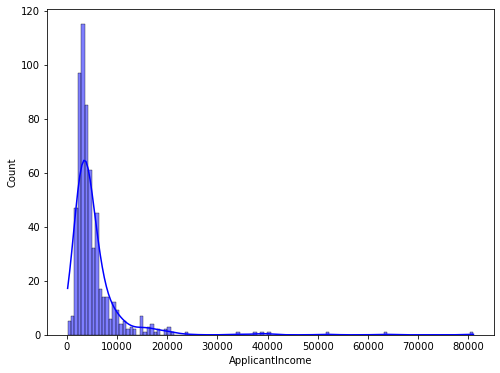

In [398]:
# Is the ApplicantIncome distribution in line with your expectation? Similarly, what about CoapplicantIncome?
# Applicant Income
plt.figure(figsize=(8,6));
sns.histplot(x=df["ApplicantIncome"], color="Blue", kde=True);
plt.show();

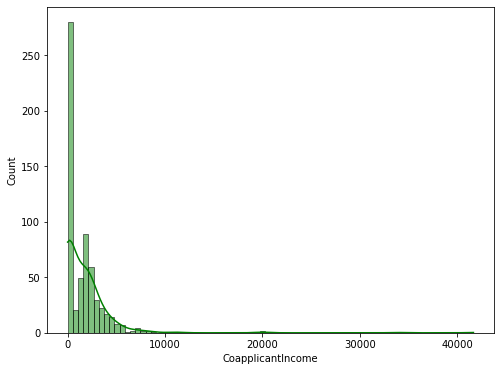

In [399]:
#Coapplicant Income
plt.figure(figsize=(8,6));
sns.histplot(x=df["CoapplicantIncome"], color="Green", kde=True);
plt.show();

In [400]:
# Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [401]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [402]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [403]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [404]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [405]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [406]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [407]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

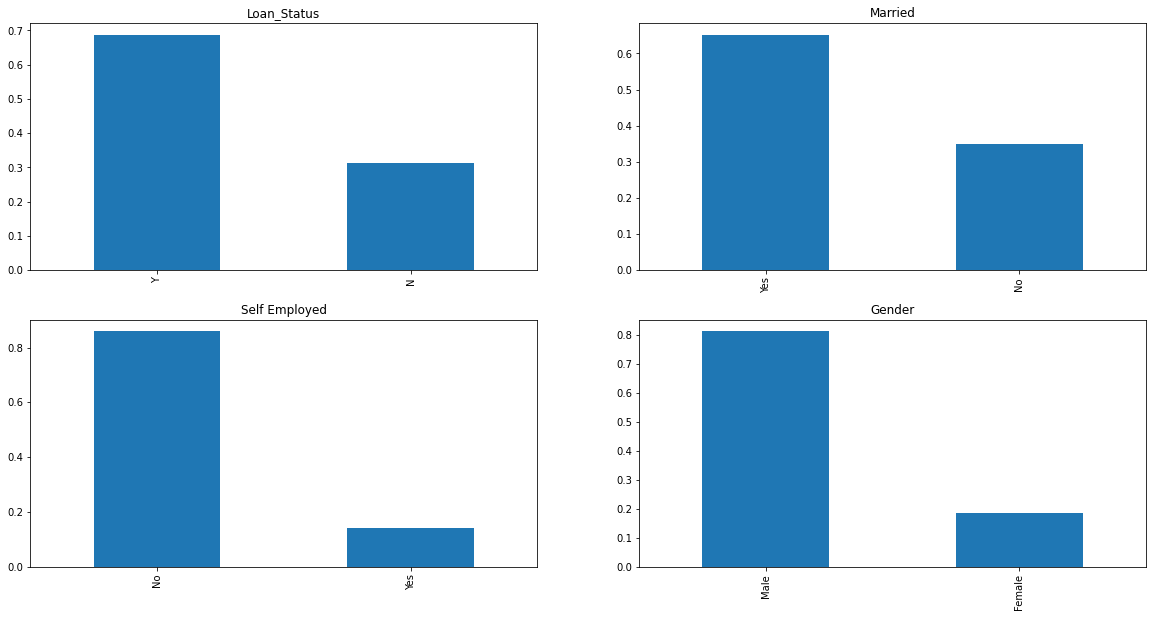

In [408]:
# plot figures
plt.figure(1) 
plt.subplot(221)
df['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(20,10), title = "Loan_Status")
plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(title = "Married")
plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title = "Self Employed")
plt.subplot(224)
df['Gender'].value_counts(normalize=True).plot.bar(title = "Gender")
plt.show()

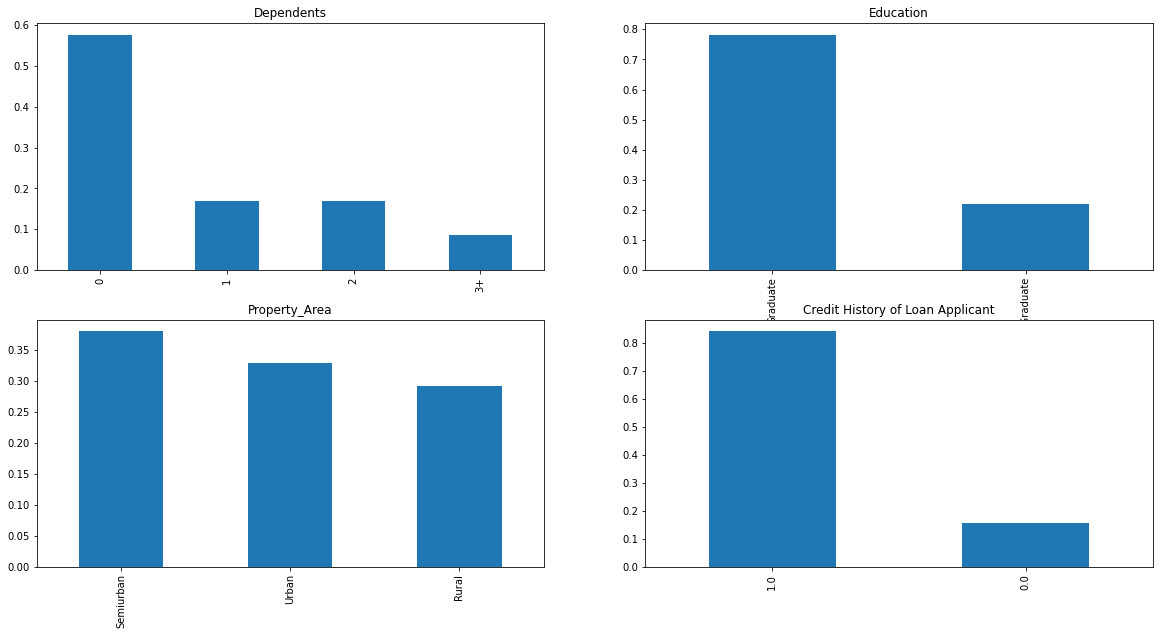

In [409]:
plt.figure(1) 
plt.subplot(221)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = "Dependents")
plt.subplot(222)
df['Education'].value_counts(normalize=True).plot.bar(title = "Education")
plt.subplot(223)
df['Property_Area'].value_counts(normalize=True).plot.bar(title = "Property_Area")
plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(title = "Credit History of Loan Applicant")
plt.show()

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [410]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [411]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [412]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [413]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [414]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [415]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [416]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



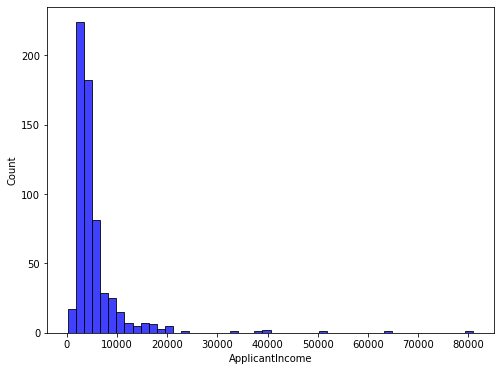

In [417]:
# Applicant Income
plt.figure(figsize=(8,6));
sns.histplot(x=df["ApplicantIncome"], bins = 50, color="Blue");
#plt.xlim(0, 15000)
plt.show();

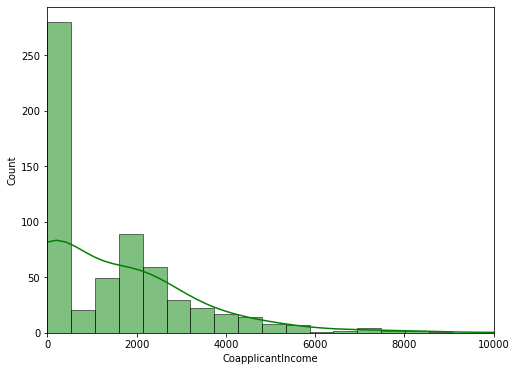

In [418]:
#Coapplicant Income
plt.figure(figsize=(8,6));
sns.histplot(x=df["CoapplicantIncome"], color="Green", kde=True);
plt.xlim(0, 10000)
plt.show();


Look at box plots to understand the distributions. 

In [419]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


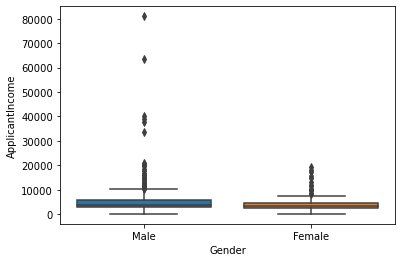

In [420]:
# gender
sns.boxplot(x="Gender", y="ApplicantIncome", data=df);

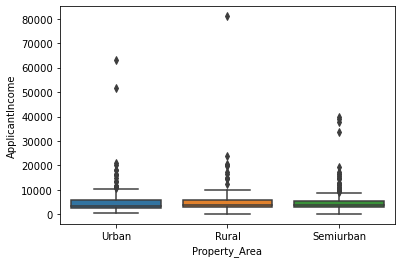

In [421]:
# Proprty Area
sns.boxplot(x="Property_Area", y="ApplicantIncome", data=df);

Look at the distribution of income segregated  by `Education`

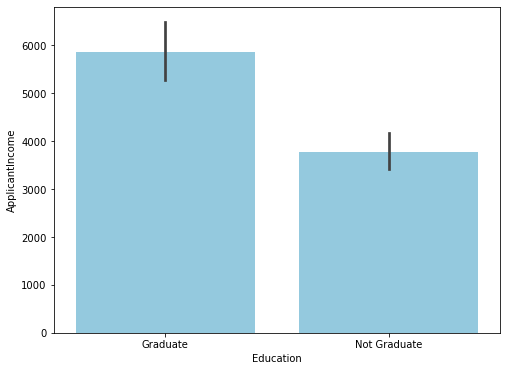

In [422]:
#Applicant income by Education
plt.figure(figsize=(8,6));
sns.barplot(x= df["Education"], y=df["ApplicantIncome"], color="Skyblue");
plt.show();

Look at the histogram and boxplot of LoanAmount

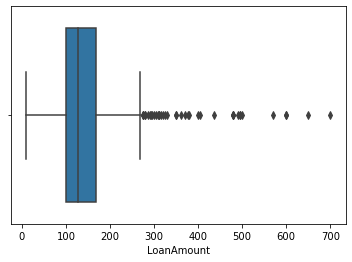

In [423]:

# Loan amount Box plot
sns.boxplot(x="LoanAmount", data=df);

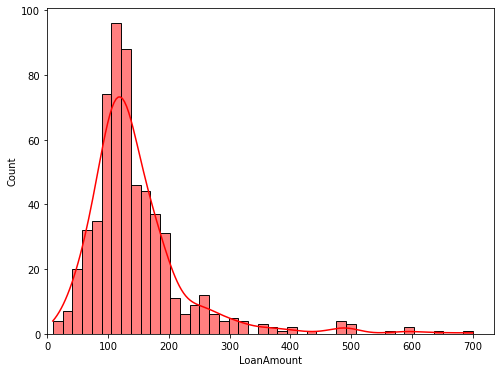

In [424]:
# Loan Amount Histogram
plt.figure(figsize=(8,6));
sns.histplot(x=df["LoanAmount"], color="Red", kde=True);
plt.xlim(0)
plt.show();

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

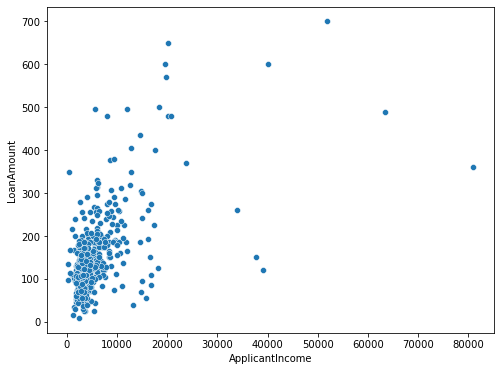

In [425]:
# Applicant income vs Loan Amount 
plt.figure(figsize=(8,6))
sns.scatterplot( x = "ApplicantIncome", y = "LoanAmount", data = df );

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

<AxesSubplot:xlabel='Loan_Status'>

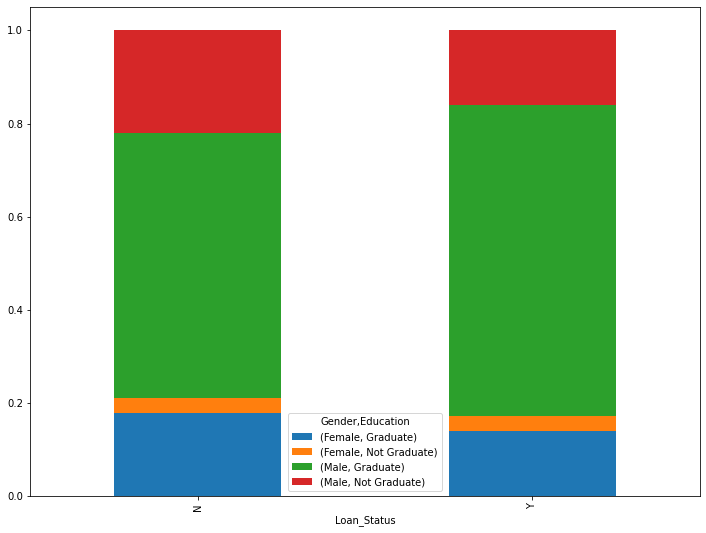

In [426]:
#plt.figure(figsize=(10,8)) #ApplicantIncome	CoapplicantIncome	LoanAmount	Loan_Amount_Term	Credit_History
#sns.histplot(binwidth=0.3, x="Gender", hue="Loan_Status", data=df, stat="count", multiple="stack");
pl = df.pivot_table(index=['Loan_Status'], columns=['Gender','Education'], values='Credit_History', aggfunc = 'sum')
pl.div(pl.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(12,9))

<AxesSubplot:xlabel='Loan_Status'>

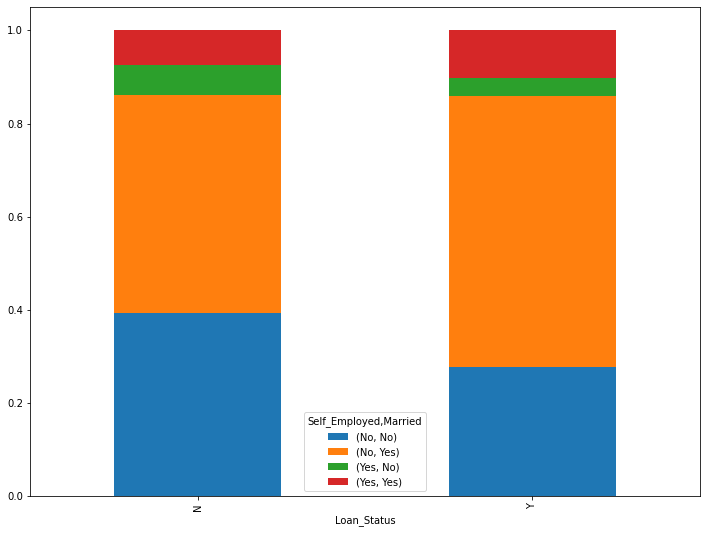

In [427]:
pl = df.pivot_table(index=['Loan_Status'], columns=['Self_Employed','Married'], values='Credit_History', aggfunc = 'sum')
pl.div(pl.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(12,9))

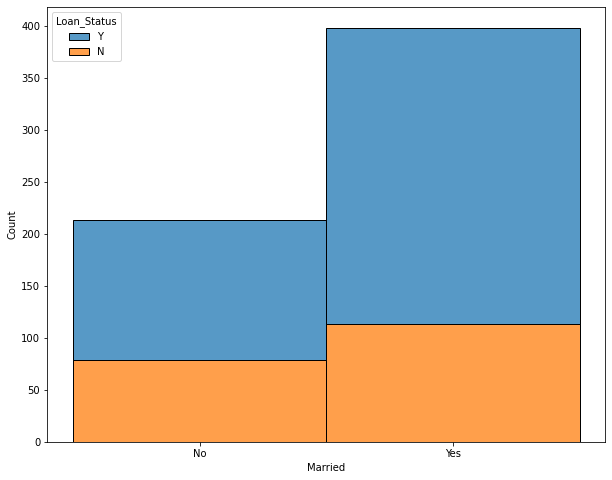

In [428]:
plt.figure(figsize=(10,8))
sns.histplot(binwidth=0.3, x="Married", hue="Loan_Status", data=df, stat="count", multiple="stack");

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [312]:
# Fill missing values
df["Gender"] = df["Gender"].replace(np.nan, 'Female')
df["Married"] = df["Married"].replace(np.nan, 'No')
df["Dependents"] = df["Dependents"].replace(np.nan, 0)
df["Self_Employed"] = df["Self_Employed"].replace(np.nan, "No")
df["LoanAmount"] = df["LoanAmount"].replace(np.nan, df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].replace(np.nan, df["Loan_Amount_Term"].mode()[0])
df["Credit_History"] = df["Credit_History"].replace(np.nan, df["Credit_History"].mode()[0])

In [313]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

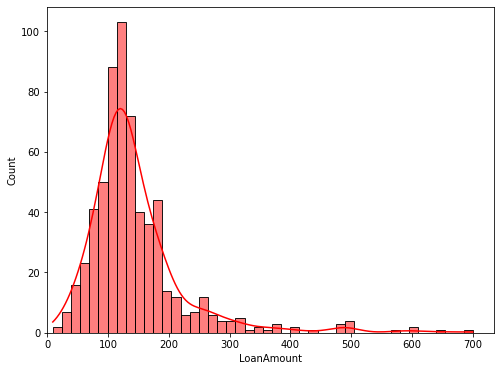

In [314]:
# Loan Amount Histogram before log transformation
plt.figure(figsize=(8,6));
sns.histplot(x=df["LoanAmount"], color="Red", kde=True);
plt.xlim(0)
plt.show();

In [315]:
# Log transformation
df["LoanAmount"] = df["LoanAmount"].apply(np.log)

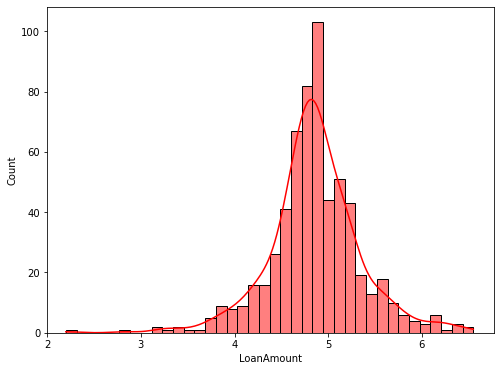

In [316]:
# Loan Amount Histogram before log transformation
plt.figure(figsize=(8,6));
sns.histplot(df["LoanAmount"], color="Red", kde=True);
plt.xlim(2)
plt.show();

Combine both incomes as total income and take a log transformation of the same.

In [429]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

In [318]:
# Log transformation total income
df["Total_Income"] = df["Total_Income"].apply(np.log)

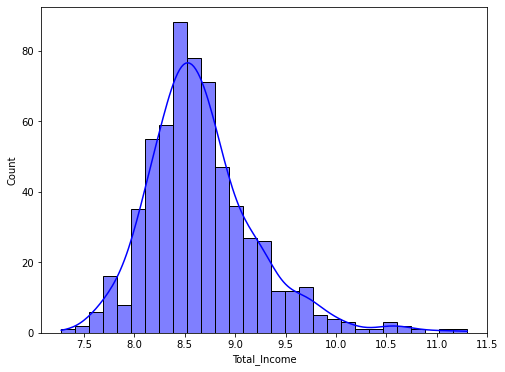

In [319]:
# Loan Amount Histogram before log transformation
plt.figure(figsize=(8,6));
sns.histplot(df["Total_Income"], color="Blue", kde=True);
plt.show();

## 4. Building a Predictive Model

In [320]:
df = df.replace({"Loan_Status": {"Y" :1, "N" : 0}, "Dependents": {"3+": 3}})

In [321]:
df = df.drop(columns=["ApplicantIncome","CoapplicantIncome"])

In [322]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,4.85203,360.0,1.0,Urban,1,8.674026
1,Male,Yes,1,Graduate,No,4.85203,360.0,1.0,Rural,0,8.714568


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [324]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [325]:
X = df.drop(columns="Loan_Status")
y = df['Loan_Status']

In [326]:
# Train and Test Data Size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [368]:
num_feats = ['LoanAmount','Loan_Amount_Term','Credit_History','Total_Income', 'Dependents']
cat_feats = ['Gender','Married','Education','Self_Employed','Property_Area']

In [369]:
from sklearn.preprocessing import StandardScaler,  FunctionTransformer
# Using own function in Pipeline
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

In [370]:
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

In [330]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,  FunctionTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [331]:
# don't forget ToDenseTransformer after one hot encoder
# To Dense 
from scipy import sparse
class ToDenseTransformer(BaseEstimator, TransformerMixin):
    def transform(self, X, y=None):
        return np.asarray(sparse.csr_matrix(X).todense())
    
    def fit(self, X, y=None):
        return self
   

In [332]:
numeric_transform = Pipeline([('num', keep_num),
                             ('scaling', StandardScaler()),
                             ('select_KBest', SelectKBest(k=5))
                             ])

In [333]:
categorical_transform = Pipeline([('cat', keep_cat),
                                  ('one-hot-encode', OneHotEncoder(sparse=False)),
                                  ('to_dense', ToDenseTransformer()),
                                  ('pca', PCA(n_components=5))
                                 ])

In [334]:
all_features = FeatureUnion([ ('numeric', numeric_transform),
                               ('categorical', categorical_transform)
                            ])

### Logistic Regression

In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

pipeline = Pipeline([('features', all_features), 
                     ('model', LogisticRegression())])

# Display HTML representation in a jupyter context
from sklearn import set_config
set_config(display='diagram')

pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('num',
                                                                  FunctionTransformer(func=<function numFeat at 0x000001A31E93A040>)),
                                                                 ('scaling',
                                                                  StandardScaler()),
                                                                 ('select_KBest',
                                                                  SelectKBest(k=5))])),
                                                ('categorical',
                                                 Pipeline(steps=[('cat',
                                                                  FunctionTransformer(func=<function catFeat at 0x000001A31E93A280>)),
                                                                 ('one-hot-encode',
                                                                  OneHotEncoder(sparse=False)),
                                                                 ('to_dense',
                                                                  ToDenseTransformer()),
                                                                 ('pca',
                                                                  PCA(n_components=5))]))])),
                ('model', LogisticRegression())])

In [336]:
# fit the pipeline to the training data
model =pipeline.fit(X_train, y_train)

In [337]:
# predict
y_pred = model.predict(X_test)

In [338]:
#Accuracy Score
accuracy_score(y_test, y_pred)

0.8709677419354839

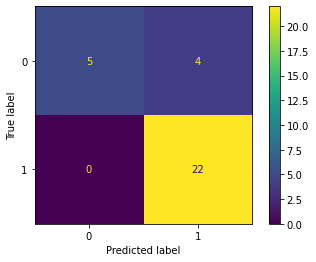

In [339]:
# COnfuison Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### Grid Search for Logistic Regression

In [340]:
from sklearn.model_selection import GridSearchCV

param_grid = {'features__categorical__pca__n_components': [2, 3, 5],
     'features__numeric__select_KBest__k': [2, 3, 5],
     'model': [LogisticRegression()],
     'model__penalty': ['none', 'l2'],
    }

In [341]:
#create a grid search object
grid_search1 = GridSearchCV(pipeline, param_grid=param_grid, cv = 3, n_jobs=-1, verbose=1)

In [342]:
#fit the grid search object to the training data
grid_search1.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numeric',
                                                                        Pipeline(steps=[('num',
                                                                                         FunctionTransformer(func=<function numFeat at 0x000001A31E93A040>)),
                                                                                        ('scaling',
                                                                                         StandardScaler()),
                                                                                        ('select_KBest',
                                                                                         SelectKBest(k=5))])),
                                                                       ('categorical',
                                                                        Pipeline(

In [343]:
#print the best parameters
print("Best parameters found:" , grid_search1.best_params_)
#print the best score
print("Best score found:", grid_search1.best_score_)

Best parameters found: {'features__categorical__pca__n_components': 3, 'features__numeric__select_KBest__k': 2, 'model': LogisticRegression(penalty='none'), 'model__penalty': 'none'}
Best score found: 0.8079037800687286


### RandomforestClassifier

In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# RandomForest Classifier
pipeline = Pipeline([('features', all_features), 
                     ('model', RandomForestClassifier(max_depth=3, n_estimators=100, criterion='gini'))])

In [345]:
# fit the pipeline to the training data
rfmodel =pipeline.fit(X_train, y_train)

In [346]:
# predict
rf_ypred =rfmodel.predict(X_test)

In [347]:
#Accuracy Score
rf_accuracy =accuracy_score(y_test, rf_ypred)
print("Accuracy Score using Random Forest is", rf_accuracy)

Accuracy Score using Random Forest is 0.8709677419354839


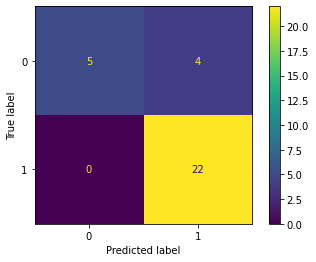

In [348]:
# COnfuison Matrix
cm = confusion_matrix(y_test, rf_ypred, labels=rfmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfmodel.classes_)
disp.plot()
plt.show()

In [349]:

param_grid = {'features__categorical__pca__n_components': [2, 3, 5],
              'features__numeric__select_KBest__k': [2, 3, 5],
              'model': [RandomForestClassifier()],
              'model__max_depth': [None,2,4,6,8],
              'model__n_estimators': [50, 100, 150, 200, 250],
              'model__criterion': ['gini', 'entropy']
         }
    

In [350]:
#create a grid search object
rfgrid_search = GridSearchCV(pipeline, param_grid=param_grid, cv = 3, n_jobs=-1, verbose=1)

In [351]:
#fit the grid search object to the training data
rfgrid_search.fit(X_train, y_train)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numeric',
                                                                        Pipeline(steps=[('num',
                                                                                         FunctionTransformer(func=<function numFeat at 0x000001A31E93A040>)),
                                                                                        ('scaling',
                                                                                         StandardScaler()),
                                                                                        ('select_KBest',
                                                                                         SelectKBest(k=5))])),
                                                                       ('categorical',
                                                                        Pipeline(

In [352]:
# predict
gridrf_ypred =rfgrid_search.predict(X_test)

In [353]:
#print the best parameters
print("Best parameters found:" , grid_search.best_params_)
#print the best score
print("Best score found:", grid_search.best_score_)

Best parameters found: {'features__categorical__pca__n_components': 2, 'features__numeric__select_KBest__k': 3, 'model': RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=250), 'model__criterion': 'entropy', 'model__max_depth': 8, 'model__n_estimators': 250}
Best score found: 0.8164860340118073


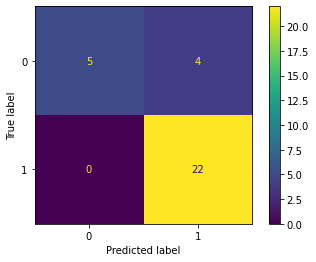

In [354]:
# COnfuison Matrix
cm = confusion_matrix(y_test, gridrf_ypred, labels=rfgrid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfgrid_search.classes_)
disp.plot()
plt.show()

### SVC

In [355]:
from sklearn.svm import SVC
# RandomForest Classifier
pipeline = Pipeline([('features', all_features), 
                     ('model', SVC() )])

In [356]:
# fit the pipeline to the training data
svc_model =pipeline.fit(X_train, y_train)

In [357]:
# predict
svc_ypred = svc_model.predict(X_test)

In [358]:
#Accuracy Score
svc_accuracy =accuracy_score(y_test, svc_ypred)
print("Accuracy Score using Random Forest is", svc_accuracy)

Accuracy Score using Random Forest is 0.8709677419354839


In [359]:
param_grid =  {'features__categorical__pca__n_components': [2, 3, 5],
     'features__numeric__select_KBest__k': [2, 3, 5],
     'model': [SVC()],
     'model__kernel': ['linear', 'poly', 'rbf'],
    }

In [360]:
#create a grid search object
grid_search2 = GridSearchCV(pipeline, param_grid=param_grid, cv = 3, n_jobs=-1, verbose=1)

In [361]:
#fit the grid search object to the training data
grid_search2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numeric',
                                                                        Pipeline(steps=[('num',
                                                                                         FunctionTransformer(func=<function numFeat at 0x000001A31E93A040>)),
                                                                                        ('scaling',
                                                                                         StandardScaler()),
                                                                                        ('select_KBest',
                                                                                         SelectKBest(k=5))])),
                                                                       ('categorical',
                                                                        Pipeline(

In [378]:
#print the best parameters
print("Best parameters found:" , grid_search2.best_params_)
#print the best score
print("Best score found:", grid_search2.best_score_)

Best parameters found: {'features__categorical__pca__n_components': 5, 'features__numeric__select_KBest__k': 2, 'model': SVC(), 'model__kernel': 'rbf'}
Best score found: 0.8079037800687286


In [379]:
import pickle
pickle.dump(rfgrid_search, open( "model.p", "wb" ) )

PicklingError: Can't pickle <function numFeat at 0x000001A31E93A040>: it's not the same object as __main__.numFeat

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [381]:
json_data = {
    "Gender":"Male",
    "Married":"No",
    "Dependents":0,
    "Education":"Graduate",
    "Self_Employed":"No",
    "LoanAmount":4.8520302639,
    "Loan_Amount_Term":360.0,
    "Credit_History":1.0,
    "Property_Area":"Urban",
    "Total_Income":8.6740259854}

In [382]:
import requests
URL = "http://ec2-54-202-92-109.us-west-2.compute.amazonaws.com:8000/predict"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [383]:
print(r.json())

[1]
